In [158]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [159]:
#Loading in the california dataset 
from sklearn.datasets import fetch_california_housing
california_housing = fetch_california_housing(as_frame=True)
# Extract the DataFrame containing the data and the target
california_df = california_housing.frame
#print(california_housing.DESCR)


#Separating out the Data with the output (Median House Value in the Block)
# X = california_df.drop({"MedHouseVal"}, axis = 1)

# y = california_df["MedHouseVal"]

# #Checking for any missing values in any of the feature columns
# print(np.isnan(X).sum())
# print(np.isnan(y).sum())

# #Using apply function with lambda function
# X["AveRooms"] = X["AveRooms"].apply(lambda x: np.nan if x > 100 else x)

# #Explicitly dropping missing values using the dropna() function
# plt.boxplot(X["AveRooms"].dropna(), labels = ["AveRooms"])

# plt.show()

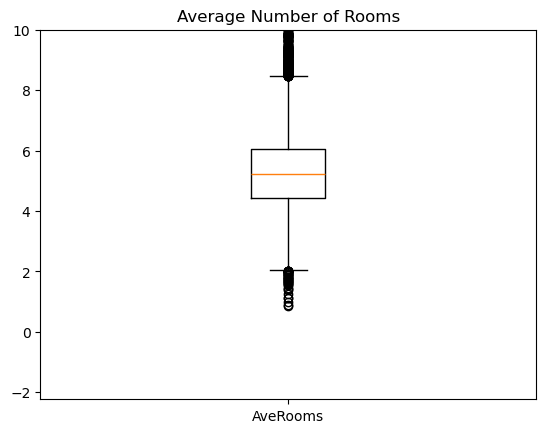

In [160]:
X.loc[X["AveRooms"]> 100] = np.nan 
plt.boxplot(x = X["AveRooms"].dropna(), labels = ["AveRooms"])
plt.ylim(top = 10)
plt.title("Average Number of Rooms")
plt.show()

In [161]:
#Define the standardize functino 
def standardise(x):
    return (x- x.mean())/(x.max()- x.min())

california_df = california_df.apply(standardise, axis = 0)



In [162]:
import numpy as np 

def linear_function(X, theta):
    return np.dot(X, theta)

def loss_function(y_true, y_pred):
    return np.mean((y_true - y_pred)**2)

def derivative(X, y_true, y_pred):
    return -2/(X.shape[0]) * (np.dot(X.T, (y_true - y_pred)))

def initialize_theta(X):
    return np.zeros(shape = (X.shape[1],1))

def update_theta(theta ,alpha, X, y_true, y_pred):
    grad = derivative(X, y_true, y_pred)
    return theta - alpha*grad



Final theta:  [[ 0.10281191]
 [ 0.02754124]
 [ 0.00305537]
 [-0.00071144]
 [-0.00081883]
 [-0.0002427 ]
 [-0.03498625]
 [-0.01298663]]
Final loss:  0.051508862208874996


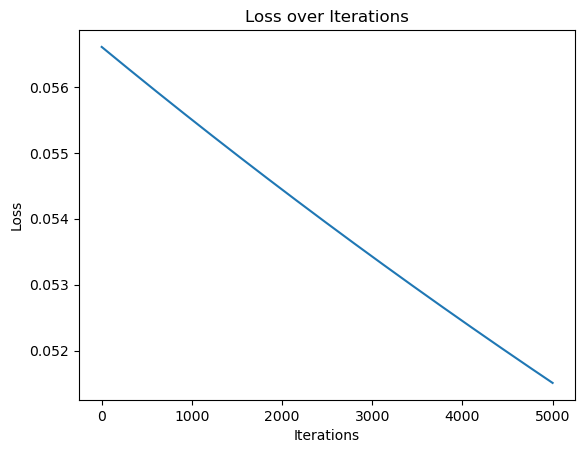

In [163]:
loss_list = []
i = 0 
alpha = 0.0005
iterations = 5000

X = california_df.drop({"MedHouseVal"}, axis = 1).values
y_true = california_df["MedHouseVal"].values.reshape(-1,1)

theta = initialize_theta(X)
for i in range(iterations):
    y_pred = linear_function(X, theta)
    loss = loss_function(y_true, y_pred)
    loss_list.append(loss)
    theta = update_theta(theta, alpha, X, y_true, y_pred)

print("Final theta: ", theta)
print("Final loss: ", loss_list[-1])

plt.plot(range(iterations), loss_list)
plt.xlabel("Iterations")
plt.ylabel('Loss')
plt.title("Loss over Iterations")
plt.show()

Theta: [[ 0.10279353]
 [ 0.02752936]
 [ 0.00305319]
 [-0.00071202]
 [-0.00081013]
 [-0.00024146]
 [-0.03496633]
 [-0.01299467]]
Loss list: [0.055783244713096196, 0.054853024450693996, 0.05817526812354283, 0.05595889124205647, 0.05623042730119921, 0.05779693406143479, 0.0567125353799253, 0.05546543587369013, 0.05694725465250731, 0.05685128729728688, 0.056933328950962814, 0.05576835796959056, 0.055894933853104976, 0.0554922315474722, 0.05610505402618893, 0.05576700976722517, 0.05559416002397129, 0.057156056198552165, 0.056637213777377474, 0.055490385431892074, 0.05629629230239717, 0.05740494387111489, 0.05558079755789294, 0.05474910733342576, 0.05769812216650679, 0.05782464380769496, 0.05745556960345488, 0.05579219088911669, 0.05679647837763473, 0.057149518159095934, 0.0568524704650638, 0.05659234708696148, 0.05493947270896334, 0.05721165010560623, 0.056975641696503196, 0.0585369587241344, 0.05689796858486135, 0.05638747401704574, 0.05669041526627825, 0.057551302450826174, 0.057495346694

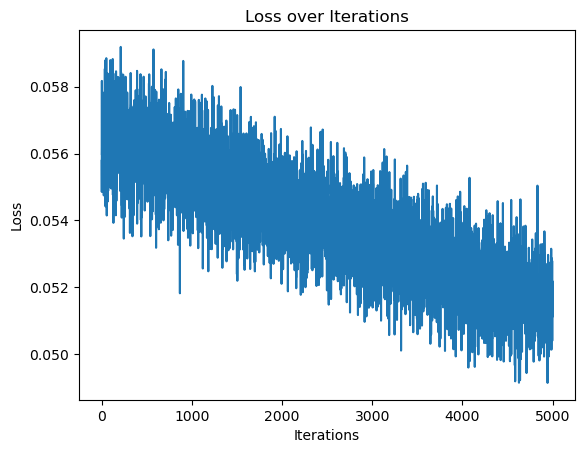

In [169]:
import numpy as np 

def linear_function(X, theta):
    return np.dot(X, theta)

def loss_function(y_true, y_pred):
    return np.mean((y_true - y_pred)**2)

def derivative(X, y_true, y_pred):
    return -2/(X.shape[0]) * (np.dot(X.T, (y_true - y_pred)))

def initialize_theta(X):
    return np.zeros(shape = (X.shape[1],1))

def update_theta(theta ,alpha, X, y_true, y_pred):
    grad = derivative(X, y_true, y_pred)
    return theta - alpha*grad


loss_list = []
i = 0 
alpha = 0.0005
iterations = 5000

california_df = california_df.apply(standardise, axis = 0)

X = california_df.drop({"MedHouseVal"}, axis = 1)
y_true = california_df["MedHouseVal"]


theta = initialize_theta(X)

for i in range(iterations):
    X_sample = X.sample(n = 7000, replace = True)
    y_true = california_df.loc[X_sample.index, "MedHouseVal"].values.reshape(-1, 1)
    X_sample = X_sample.values
    y_pred = linear_function(X_sample, theta)
    loss = loss_function(y_true, y_pred)
    loss_list.append(loss)
    theta = update_theta(theta, alpha, X_sample, y_true, y_pred)

print("Theta:", theta)
print("Loss list:", loss_list)

plt.plot(range(iterations), loss_list)
plt.xlabel("Iterations")

plt.ylabel('Loss')
plt.title("Loss over Iterations")
plt.show()

